In [5]:
text = 'You say goodbye and I say hello.'
text = text.lower().replace('.', ' .')
print("'", text, "'")

' you say goodbye and i say hello . '


In [6]:
words = text.split(' ')
print(words)

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']


In [7]:
word_to_id = {}
for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id

id_to_word = {id_:  word for word, id_ in word_to_id.items()}

print(id_to_word)
print(word_to_id)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [8]:
id_to_word[1]

'say'

In [9]:
word_to_id['hello']

5

In [10]:
# equivalent to the above, using set
# difference: 위의 것은 나온 순서대로, 아래 것은 순서가 달라짐
wordset = set(words) # remove duplicates
word_to_id_2 = dict(zip(wordset,list(range(len(wordset)))))
id_to_word_2 = {id_: word for word, id_ in word_to_id_2.items()}
print(wordset)
print(id_to_word_2)
print(word_to_id_2)

{'i', 'you', 'and', 'hello', 'say', '.', 'goodbye'}
{0: 'i', 1: 'you', 2: 'and', 3: 'hello', 4: 'say', 5: '.', 6: 'goodbye'}
{'i': 0, 'you': 1, 'and': 2, 'hello': 3, 'say': 4, '.': 5, 'goodbye': 6}


In [11]:
id_to_word[1]

'say'

In [13]:
word_to_id['hello']

5

In [14]:
import numpy as np 

corpus = np.array([word_to_id[word] for word in words])
corpus 

array([0, 1, 2, 3, 4, 1, 5, 6])

In [15]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [17]:
import sys
sys.path.append('..')
#from common.util import preprocess 


text = 'Hi My name is James Louis Eunchan and you say Hi Eunchan'
corpus, word_to_id, id_to_word = preprocess(text)


corpus, word_to_id, id_to_word

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 6]),
 {'hi': 0,
  'my': 1,
  'name': 2,
  'is': 3,
  'james': 4,
  'louis': 5,
  'eunchan': 6,
  'and': 7,
  'you': 8,
  'say': 9},
 {0: 'hi',
  1: 'my',
  2: 'name',
  3: 'is',
  4: 'james',
  5: 'louis',
  6: 'eunchan',
  7: 'and',
  8: 'you',
  9: 'say'})

In [20]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size),dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i # left window_size
            right_idx = idx + i # right window_size

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [22]:
print(enumerate(corpus))

for word_id in corpus: print(word_id)
for idx, word_id in enumerate(corpus): print(idx, word_id)
for idx, word_id in corpus: print(idx, word_id) #error

0
1
2
3
4
5
6
7
8
9
0
6
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 0
11 6


TypeError: cannot unpack non-iterable numpy.int32 object

In [24]:
window_size = 1 # 주변 1개
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size)
C

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [27]:
def cos_similarity(x, y, eps=1e-8):
    # epsilon 값을 추가해,
    # 0으로 나누기 오류가 나는 것을 막아줌
    nx = x / np.sqrt(np.sum(x**2) + eps) # x의 정규화
    ny = y / np.sqrt(np.sum(y**2) + eps) # y의 정규화
    
    return np.dot(nx, ny)

In [29]:
import sys
sys.path.append('..')

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]

print(cos_similarity(c0,c1))

0.7071067758832467


In [30]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    if query not in word_to_id:
        print(f'{query}(을)를 찾을 수 없습니다.')
        return 
    print(f'\n[query] {query}')
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
    count = 0
    for i in (-1* similarity).argsort():
        if id_to_word[i] == query:
            continue 
        print(f' {id_to_word[i]}: {similarity[i]}')

        count += 1
        if count >= top:
            return 

In [31]:
text = 'You say goodbye and I say hello'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size= len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 hello: 0.9999999900000001
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 say: 0.0
 and: 0.0


In [32]:
def ppmi(C, verbose=False, eps=1e-8):

    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i,j] * N / (S[i]*S[j]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print(f'{(100*cnt/total):.2f} 완료')
    return M

In [33]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)
np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print('Co-occurrence Matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

Co-occurrence Matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [34]:
most_similar('you', word_to_id, id_to_word, W, top=5)


[query] you
 goodbye: 0.40786147117614746
 i: 0.40786147117614746
 hello: 0.2763834297657013
 say: 0.0
 and: 0.0


In [35]:
import numpy as np
import matplotlib.pyplot as plt

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)
# SVD
U, S, V = np.linalg.svd(W)

In [36]:
print(C[0]) # 동시발생 행렬
print(W[0]) # PPMI 행렬
print(U[0]) # SVD
# 2차원으로 차원 축소하기
print(U[0, :2])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -4.441e-16 -1.205e-01  0.000e+00 -9.323e-01
 -1.086e-16]
[ 3.409e-01 -1.110e-16]


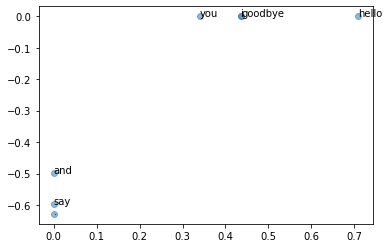

In [39]:
# 플롯
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

In [40]:
import sys
sys.path.append('..')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [41]:
window_size = 2
wordvec_size = 100 

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('Create Co-Matrix ...')
C = create_co_matrix(corpus,vocab_size, window_size)

Create Co-Matrix ...


In [42]:
print('PPMI 계산...')
W = ppmi(C, verbose=True)

PPMI 계산...
<ipython-input-32-a304c0056b08>:11: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i,j] * N / (S[i]*S[j]) + eps)
<ipython-input-32-a304c0056b08>:11: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i,j] * N / (S[i]*S[j]) + eps)
1.00 완료
2.00 완료
3.00 완료
4.00 완료
5.00 완료
6.00 완료
7.00 완료
8.00 완료
9.00 완료
10.00 완료
11.00 완료
12.00 완료
13.00 완료
14.00 완료
15.00 완료
16.00 완료
17.00 완료
18.00 완료
19.00 완료
20.00 완료
21.00 완료
22.00 완료
23.00 완료
24.00 완료
25.00 완료
26.00 완료
27.00 완료
28.00 완료
29.00 완료
30.00 완료
31.00 완료
32.00 완료
33.00 완료
34.00 완료
35.00 완료
36.00 완료
37.00 완료
38.00 완료
39.00 완료
40.00 완료
41.00 완료
42.00 완료
43.00 완료
44.00 완료
45.00 완료
46.00 완료
47.00 완료
48.00 완료
49.00 완료
50.00 완료
51.00 완료
52.00 완료
53.00 완료
54.00 완료
55.00 완료
56.00 완료
57.00 완료
58.00 완료
59.00 완료
60.00 완료
61.00 완료
62.00 완료
63.00 완료
64.00 완료
65.00 완료
66.00 완료
67.00 완료
68.00 완료
69.00 완료
70.00 완료
71.00 완료
72.00 완료
73.00 완료
74.00 완료
75.00 완료
76.00 완료
77.00 완료
78.00 완료
79.00 완료
80.00 완료
81.00 완

In [43]:
try: 
    from sklearn.utils.extmath import randomized_svd 
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,random_state=None)
except:
    U, S, V = np.linalg.svd(W)


word_vecs = U[:, :wordvec_size]
querys = ['you', 'year', 'car', 'toyota']

for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 i: 0.7067299485206604
 we: 0.6689852476119995
 do: 0.5927650332450867
 anybody: 0.5396730303764343
 'll: 0.5178669691085815

[query] year
 month: 0.7032848000526428
 quarter: 0.6717913150787354
 last: 0.629091739654541
 earlier: 0.5866899490356445
 next: 0.582098126411438

[query] car
 auto: 0.612777054309845
 corsica: 0.5656982660293579
 truck: 0.5479524731636047
 vehicle: 0.5002317428588867
 luxury: 0.47255587577819824

[query] toyota
 motor: 0.699421226978302
 nissan: 0.6756729483604431
 lexus: 0.6293434500694275
 motors: 0.5929510593414307
 honda: 0.5868485569953918


In [44]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(U[1000:1100,:])

In [45]:
vocab = list(id_to_word.values())

In [47]:
df = pd.DataFrame(X_tsne, index=vocab[1000:1100], columns=['x', 'y'])
df.shape

(100, 2)

In [48]:
df.head(10)

,x,y
dec.,-25.712601,-34.736233
ruling,0.934758,71.363625
slash,-11.687548,8.477380
earnings,81.321228,-16.838337
spokesman,-57.374363,-50.257366
tracking,15.940672,20.198761
whose,-19.829115,52.531094
addresses,18.684278,-15.217928
changed,-48.074123,12.964805
past,41.325455,-35.261795


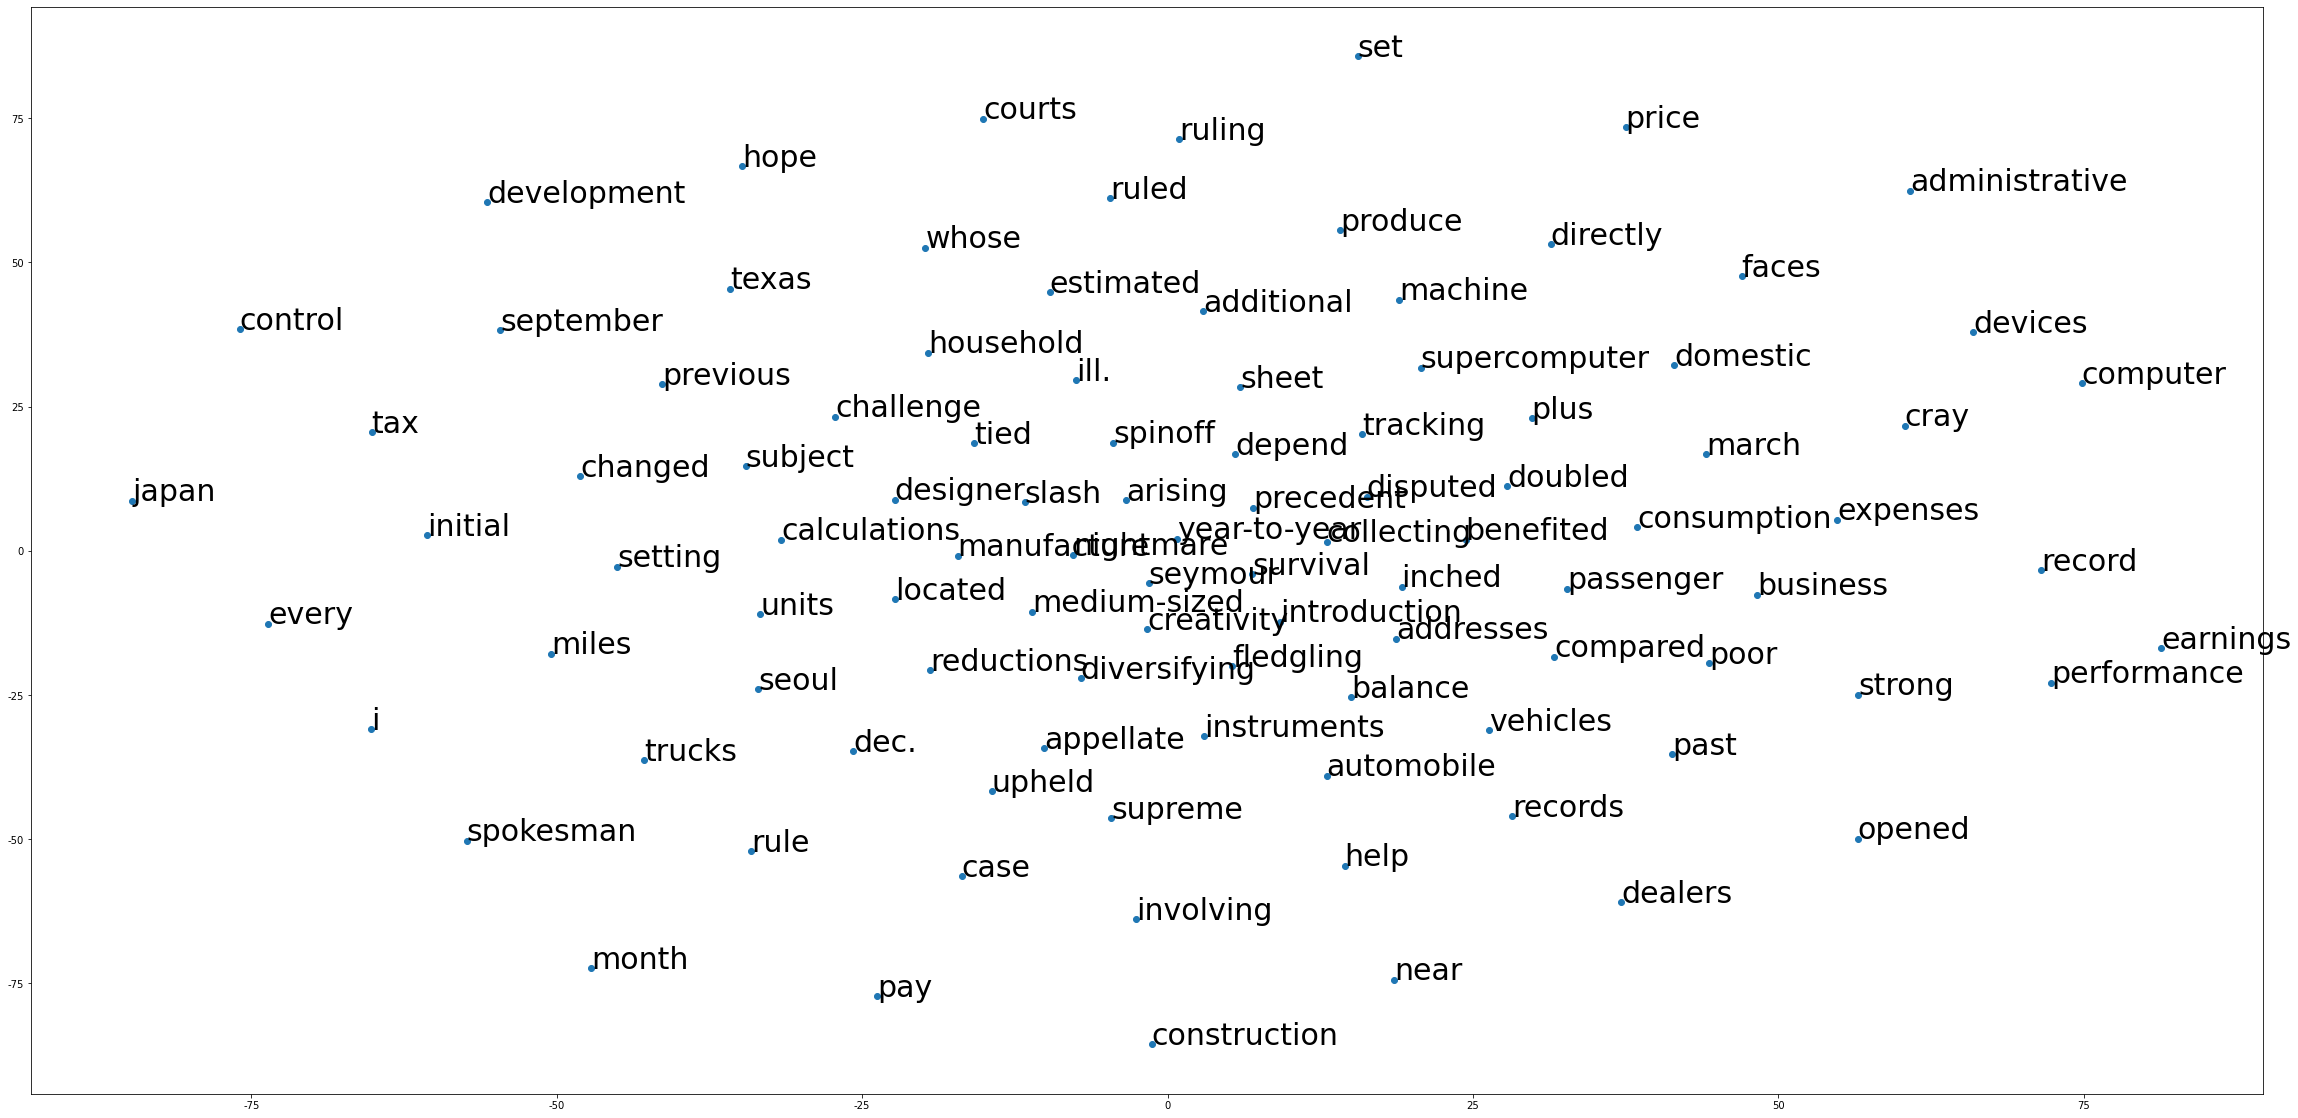

In [50]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()